In [2]:
!unzip mnist.zip

Se truncaron las últimas líneas 5000 del resultado de transmisión.
  inflating: mnist/train/5/2413.png  
  inflating: mnist/train/5/2445.png  
  inflating: mnist/train/5/2452.png  
  inflating: mnist/train/5/2460.png  
  inflating: mnist/train/5/2476.png  
  inflating: mnist/train/5/2487.png  
  inflating: mnist/train/5/2515.png  
  inflating: mnist/train/5/2518.png  
  inflating: mnist/train/5/2525.png  
  inflating: mnist/train/5/2526.png  
  inflating: mnist/train/5/2540.png  
  inflating: mnist/train/5/2545.png  
  inflating: mnist/train/5/2546.png  
  inflating: mnist/train/5/2554.png  
  inflating: mnist/train/5/2556.png  
  inflating: mnist/train/5/2558.png  
  inflating: mnist/train/5/2559.png  
  inflating: mnist/train/5/2569.png  
  inflating: mnist/train/5/2573.png  
  inflating: mnist/train/5/2574.png  
  inflating: mnist/train/5/2581.png  
  inflating: mnist/train/5/2586.png  
  inflating: mnist/train/5/2597.png  
  inflating: mnist/train/5/2604.png  
  inflating: mnist/tr

In [3]:
from glob import glob

train_files = glob('./mnist/train/*/*.png')
valid_files = glob('./mnist/valid/*/*.png')
test_files = glob('./mnist/test/*/*.png')

train_files[0]

'./mnist/train/1/6783.png'

In [4]:
import numpy as np

np.random.shuffle(train_files)
np.random.shuffle(valid_files)
np.random.shuffle(test_files)

len(train_files), len(valid_files), len(test_files)

(6000, 2000, 992)

In [5]:
from PIL import Image

N_train = len(train_files)
X_train = []
Y_train = []

for i, train_file in enumerate(train_files):
  Y_train.append( int(train_file.split('/')[3]) )
  X_train.append(np.array(Image.open(train_file)))

In [6]:
N_valid = len(valid_files)
X_valid = []
Y_valid = []

for i, valid_file in enumerate(valid_files):
  Y_valid.append( int(valid_file.split('/')[3]) )
  X_valid.append( np.array(Image.open(valid_file)) )

In [7]:
N_test = len(test_files)
X_test = []
Y_test = []

for i, test_file in enumerate(test_files):
  Y_test.append( int(test_file.split('/')[3]) )
  X_test.append( np.array(Image.open(test_file)) )

In [8]:
import torch
from torch.autograd import Variable


X_train = Variable(torch.from_numpy(np.array(X_train))).float()
Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

X_test = Variable(torch.from_numpy(np.array(X_test))).float()
Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

X_train.data.size()

torch.Size([6000, 28, 28])

In [9]:
from sklearn.metrics import confusion_matrix

def CM(Y_true, Y_pred, classes):
  fig = plt.figure(figsize=(10, 10))
  cm = confusion_matrix(Y_true, Y_pred)
  lclasses = np.arange(0,classes)
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  cmap=plt.cm.Blues
  ax = fig.add_subplot(1,1,1)
  im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
  ax.figure.colorbar(im, ax=ax, pad=0.01, shrink=0.86)
  ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),xticklabels=lclasses, yticklabels=lclasses)
  ax.set_xlabel("Predicted",size=20)
  ax.set_ylabel("True",size=20)
  ax.set_ylim(classes-0.5, -0.5)

  plt.setp(ax.get_xticklabels(), size=12)
  plt.setp(ax.get_yticklabels(), size=12)

  fmt = '.2f'
  thresh = cm.max()/2.
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",size=15 , color="white" if cm[i, j] > thresh else "black")

  plt.show()

In [10]:
from sklearn.metrics import f1_score

def train_valid(model, n_epoch, optimizer, criterion):
  loss_train = []
  f1_train = []
  acc_train = []

  loss_valid = []
  f1_valid = []
  acc_valid = []

  for epoch in range(n_epoch):
    model.train()

    Xtr = X_train.view(X_train.size(0), -1)
    Y_pred = model(Xtr)

    loss = criterion(Y_pred,Y_train)
    loss_train.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_train.append( f1_score(Y_train,Y_pred, average='macro') )
    
    acc = sum(Y_train == Y_pred)/len(Y_pred)
    acc_train.append(acc)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    Xvl = X_valid.view(X_valid.size(0), -1)
    Y_pred = model(Xvl)  
    loss = criterion(Y_pred,Y_valid)
    loss_valid.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

    acc = sum(Y_valid == Y_pred)/len(Y_pred)
    acc_valid.append(acc)

  print( 'Valid Evaluation loss: {}. f1:{} acc: {} '.format(loss_valid[-1], f1_valid[-1], acc_valid[-1]) )
  CM(Y_valid, Y_pred, 10)

In [12]:
import matplotlib.pyplot as plt


  0%|          | 0/32 [00:00<?, ?it/s]

ne: 75, hd:30, wd:0.005, lr: 0.005, bs:128 
Valid Evaluation loss: 1.5412049293518066. f1:0.41023341032445976 acc: 0.4740000069141388 


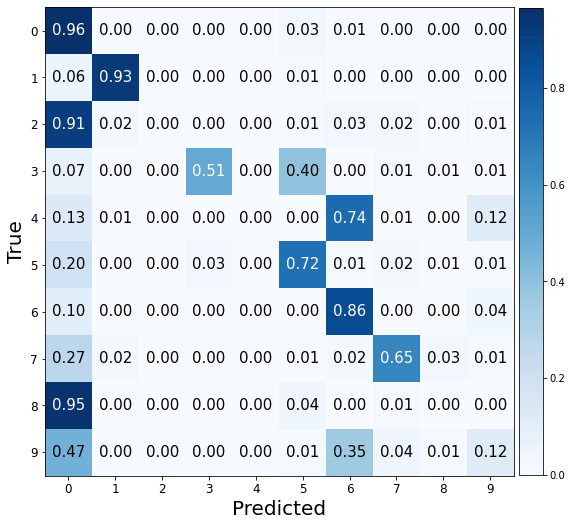

###################

ne: 75, hd:50, wd:0.005, lr: 0.005, bs:128 
Valid Evaluation loss: 1.1892987489700317. f1:0.6112834162074268 acc: 0.6439999938011169 


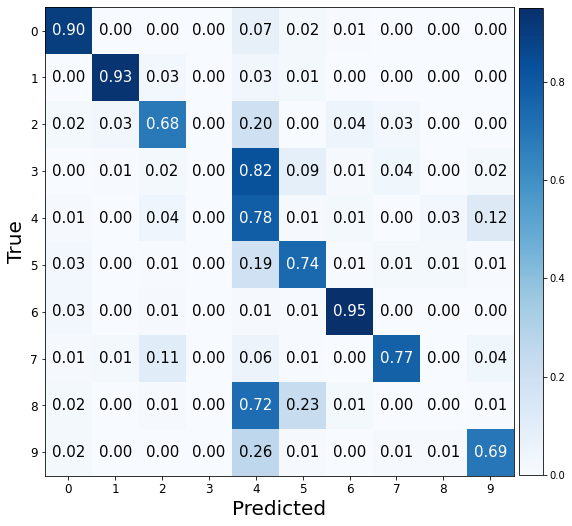

###################

ne: 75, hd:30, wd:0.05, lr: 0.005, bs:128 
Valid Evaluation loss: 2.0105552673339844. f1:0.1754338885445707 acc: 0.23899999260902405 


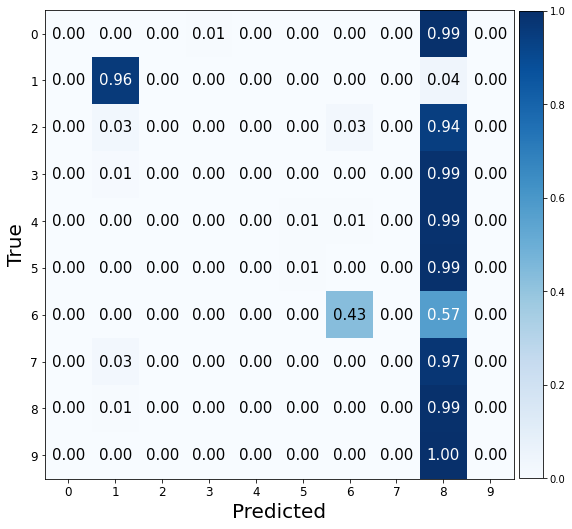

###################

ne: 75, hd:50, wd:0.05, lr: 0.005, bs:128 
Valid Evaluation loss: 0.9295686483383179. f1:0.7158932005875633 acc: 0.7235000133514404 


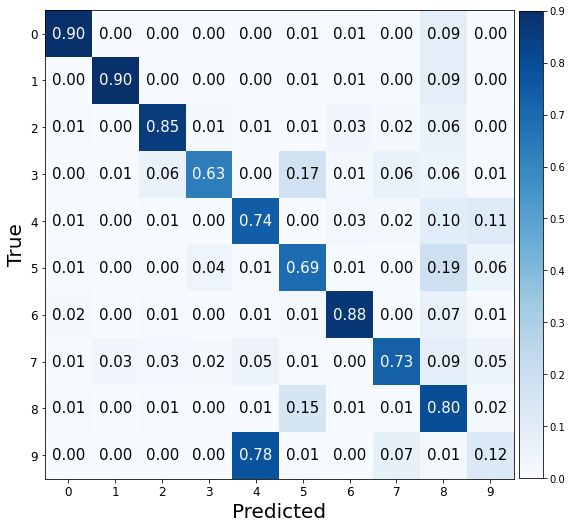

###################

ne: 75, hd:30, wd:0.005, lr: 0.05, bs:128 
Valid Evaluation loss: 2.156111240386963. f1:0.09425764596848936 acc: 0.16050000488758087 


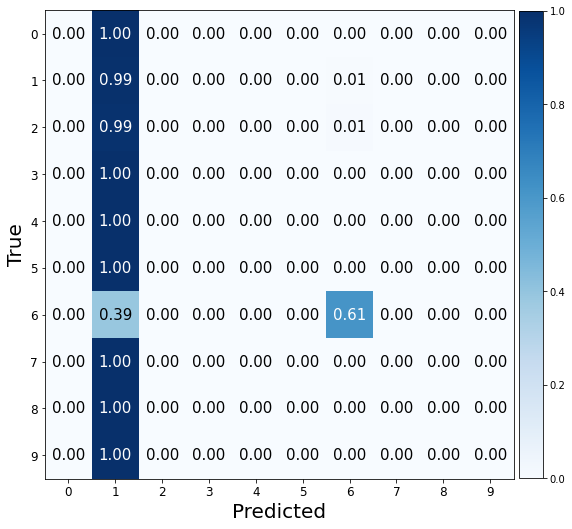

###################

ne: 75, hd:50, wd:0.005, lr: 0.05, bs:128 
Valid Evaluation loss: 2.4550914764404297. f1:0.17449862882771805 acc: 0.22550000250339508 


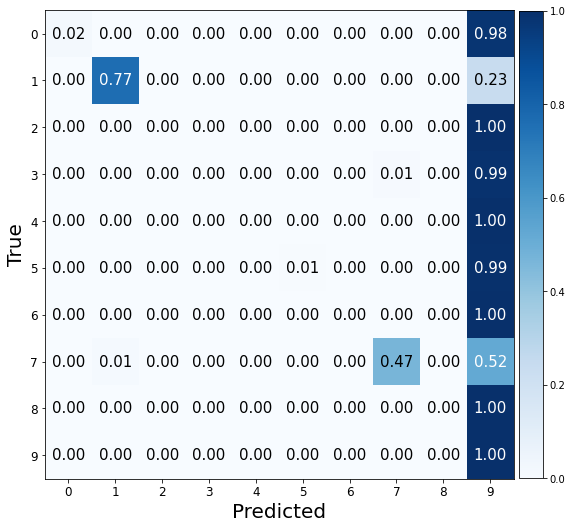

###################

ne: 75, hd:30, wd:0.05, lr: 0.05, bs:128 
Valid Evaluation loss: 2.3211896419525146. f1:0.09911588298534488 acc: 0.16850000619888306 


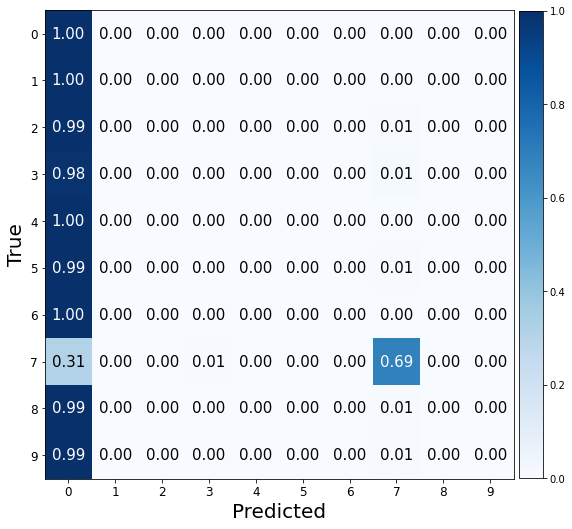

###################

ne: 75, hd:50, wd:0.05, lr: 0.05, bs:128 
Valid Evaluation loss: 2.2010698318481445. f1:0.0818010101091988 acc: 0.1459999978542328 


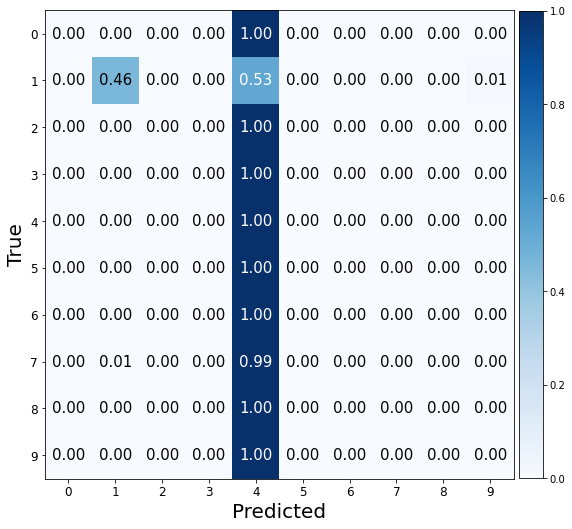

###################

ne: 75, hd:30, wd:0.005, lr: 0.005, bs:300 
Valid Evaluation loss: 1.503282904624939. f1:0.43316624875219417 acc: 0.4925000071525574 


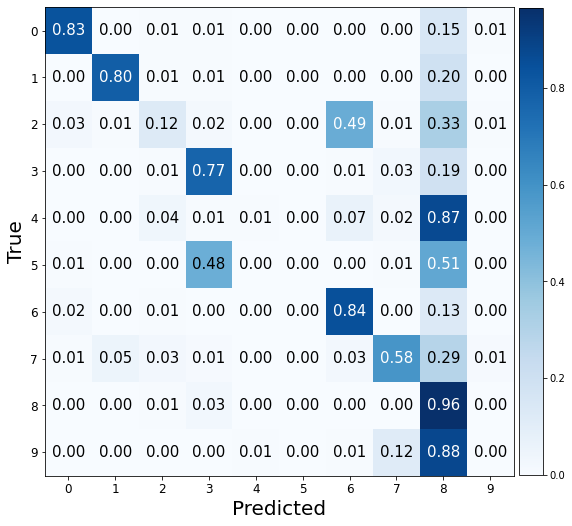

###################

ne: 75, hd:50, wd:0.005, lr: 0.005, bs:300 
Valid Evaluation loss: 0.8718951940536499. f1:0.8313321122210915 acc: 0.8230000138282776 


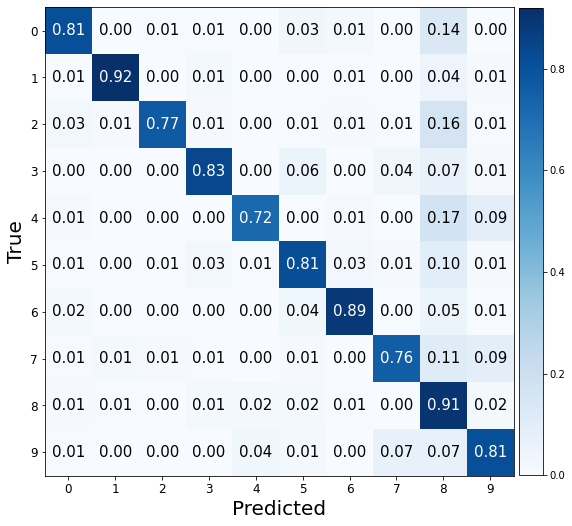

###################

ne: 75, hd:30, wd:0.05, lr: 0.005, bs:300 
Valid Evaluation loss: 1.6807429790496826. f1:0.351194867014141 acc: 0.41999998688697815 


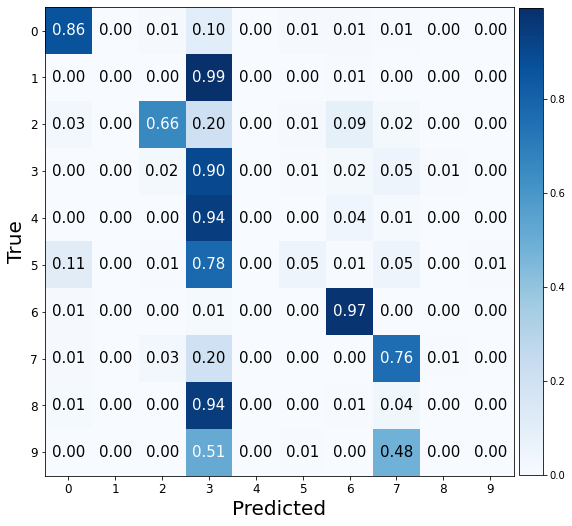

###################

ne: 75, hd:50, wd:0.05, lr: 0.005, bs:300 
Valid Evaluation loss: 1.1457360982894897. f1:0.5866831697235553 acc: 0.6230000257492065 


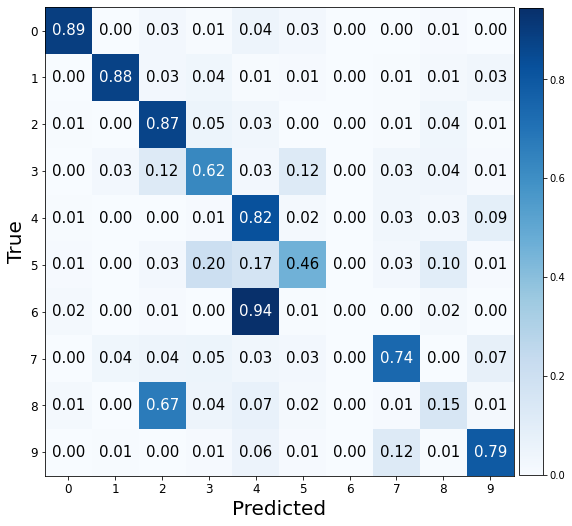

###################

ne: 75, hd:30, wd:0.005, lr: 0.05, bs:300 
Valid Evaluation loss: 2.2282490730285645. f1:0.10303192096076133 acc: 0.17149999737739563 


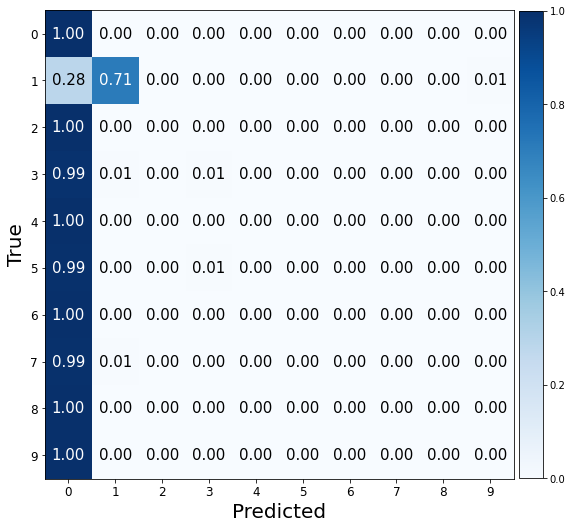

###################

ne: 75, hd:50, wd:0.005, lr: 0.05, bs:300 
Valid Evaluation loss: 2.3770956993103027. f1:0.16895432283072734 acc: 0.21850000321865082 


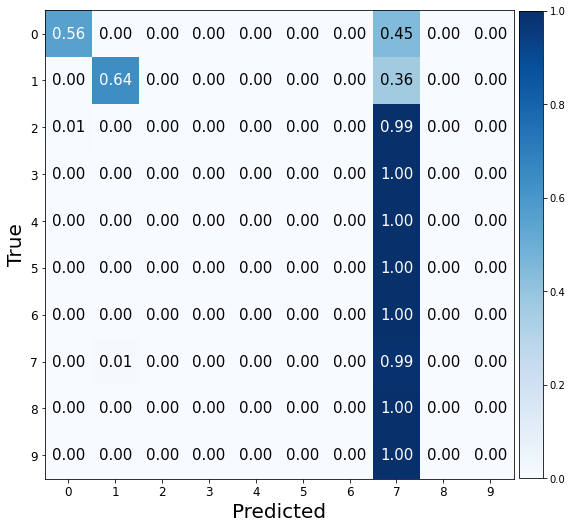

###################

ne: 75, hd:30, wd:0.05, lr: 0.05, bs:300 
Valid Evaluation loss: 2.1932811737060547. f1:0.1542114091212193 acc: 0.20550000667572021 


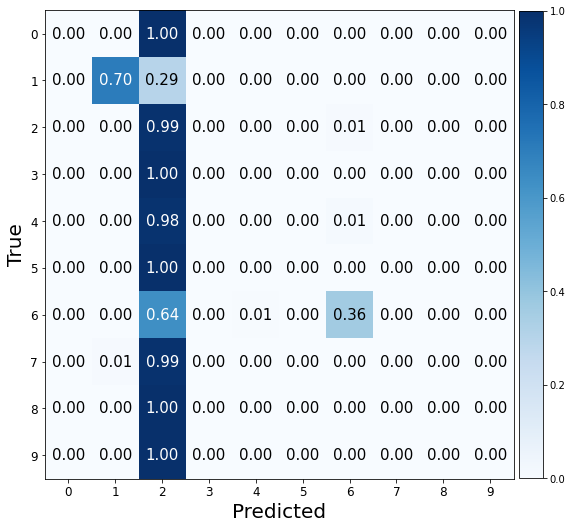

###################

ne: 75, hd:50, wd:0.05, lr: 0.05, bs:300 
Valid Evaluation loss: 2.3987202644348145. f1:0.08731142124255467 acc: 0.1525000035762787 


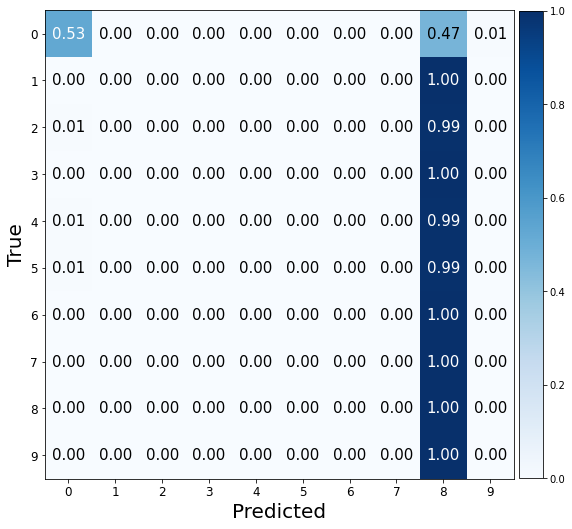

###################

ne: 125, hd:30, wd:0.005, lr: 0.005, bs:128 
Valid Evaluation loss: 1.4701071977615356. f1:0.45306785753450934 acc: 0.49950000643730164 


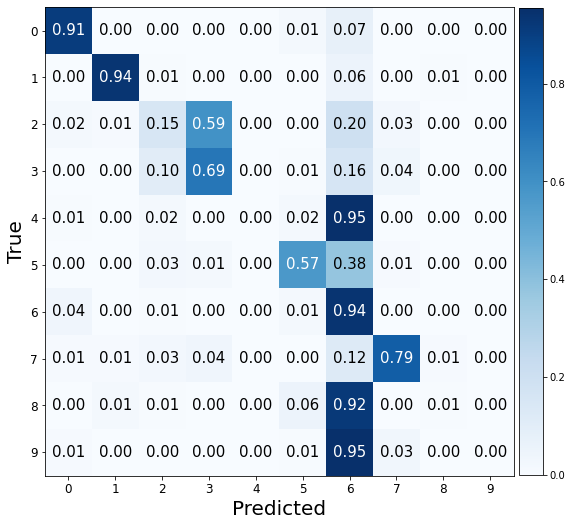

###################

ne: 125, hd:50, wd:0.005, lr: 0.005, bs:128 
Valid Evaluation loss: 0.9426274299621582. f1:0.790893260244105 acc: 0.7879999876022339 


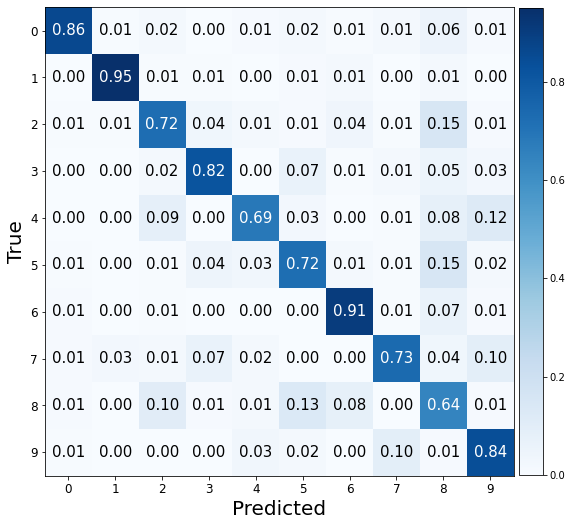

###################

ne: 125, hd:30, wd:0.05, lr: 0.005, bs:128 
Valid Evaluation loss: 1.7338430881500244. f1:0.2889858035319821 acc: 0.3504999876022339 


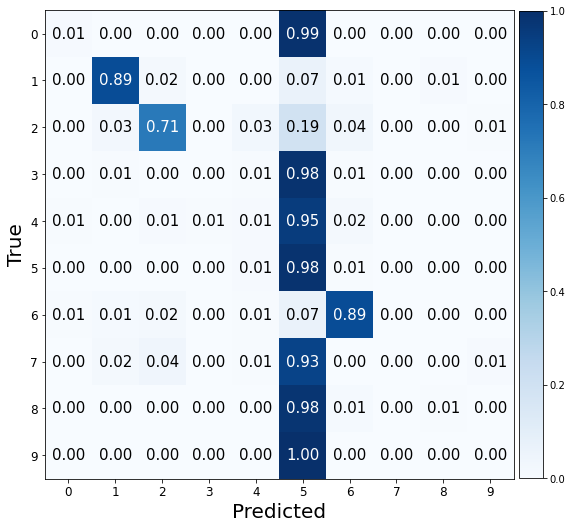

###################

ne: 125, hd:50, wd:0.05, lr: 0.005, bs:128 
Valid Evaluation loss: 0.8256829380989075. f1:0.8171273051800121 acc: 0.8144999742507935 


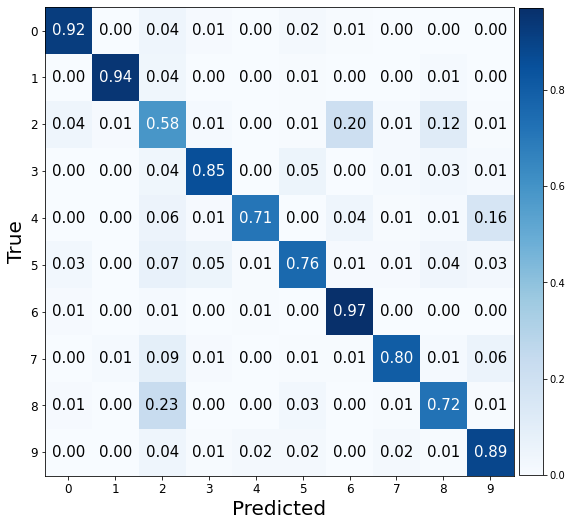

###################

ne: 125, hd:30, wd:0.005, lr: 0.05, bs:128 
Valid Evaluation loss: 2.288378953933716. f1:0.03312983312983313 acc: 0.1080000028014183 


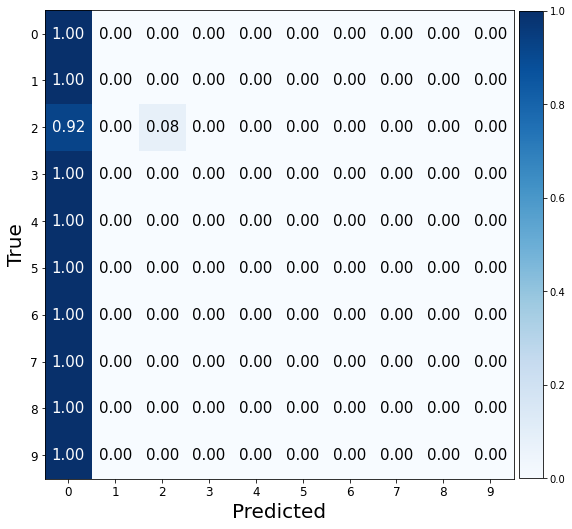

###################

ne: 125, hd:50, wd:0.005, lr: 0.05, bs:128 
Valid Evaluation loss: 2.1647801399230957. f1:0.15333741364121112 acc: 0.2070000022649765 


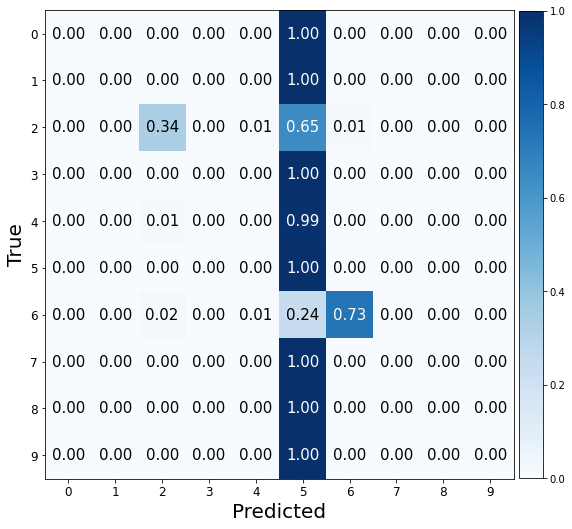

###################

ne: 125, hd:30, wd:0.05, lr: 0.05, bs:128 
Valid Evaluation loss: 2.2108705043792725. f1:0.2757522714962068 acc: 0.328000009059906 


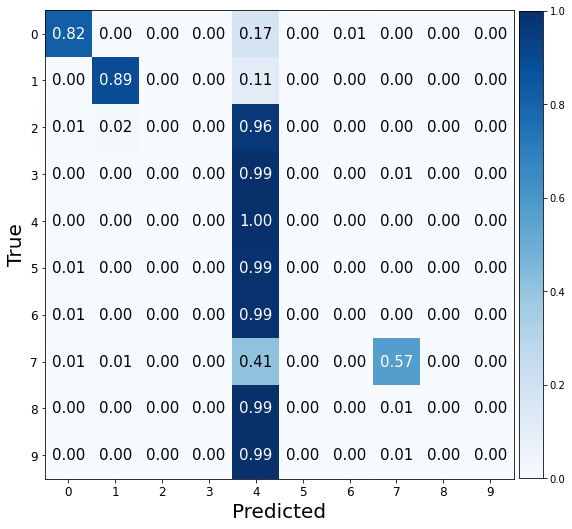

###################

ne: 125, hd:50, wd:0.05, lr: 0.05, bs:128 
Valid Evaluation loss: 2.30637264251709. f1:0.17892572069600002 acc: 0.23250000178813934 


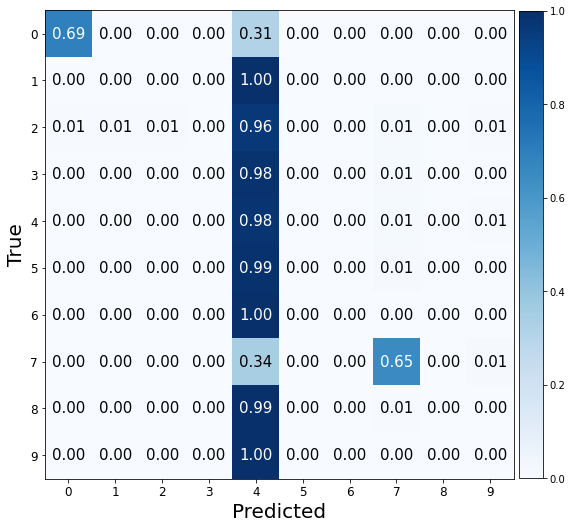

###################

ne: 125, hd:30, wd:0.005, lr: 0.005, bs:300 
Valid Evaluation loss: 1.6991379261016846. f1:0.3343892681552735 acc: 0.39149999618530273 


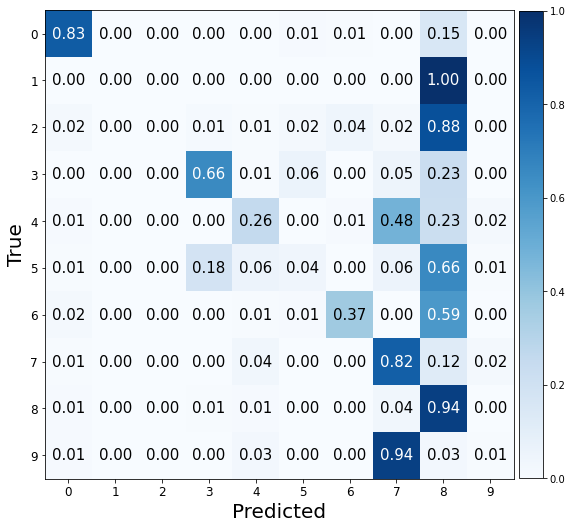

###################

ne: 125, hd:50, wd:0.005, lr: 0.005, bs:300 
Valid Evaluation loss: 1.315356731414795. f1:0.6218208885881734 acc: 0.6370000243186951 


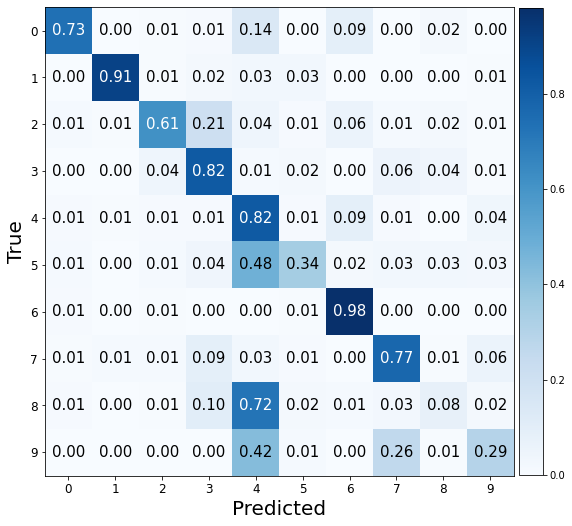

###################

ne: 125, hd:30, wd:0.05, lr: 0.005, bs:300 
Valid Evaluation loss: 0.9163324236869812. f1:0.7446085321270263 acc: 0.7450000047683716 


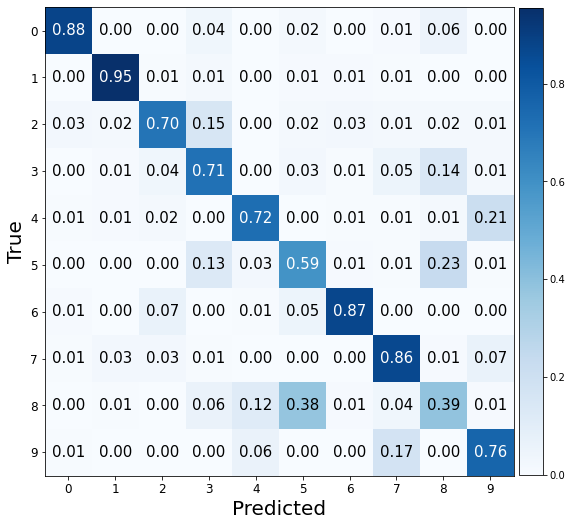

###################

ne: 125, hd:50, wd:0.05, lr: 0.005, bs:300 
Valid Evaluation loss: 0.7046064734458923. f1:0.8252678547762244 acc: 0.8270000219345093 


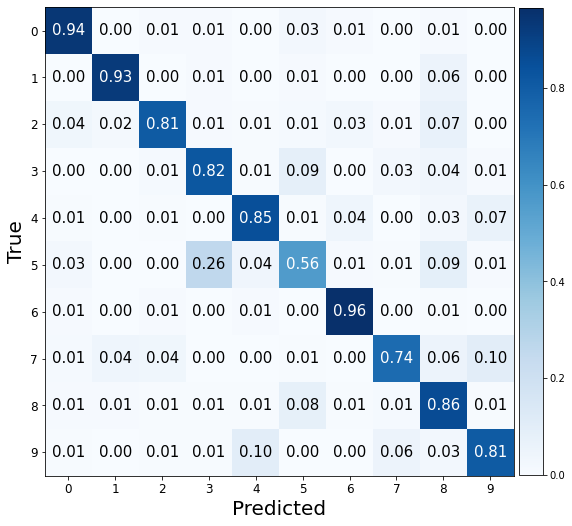

###################

ne: 125, hd:30, wd:0.005, lr: 0.05, bs:300 
Valid Evaluation loss: 3.254350423812866. f1:0.22094316812961828 acc: 0.2540000081062317 


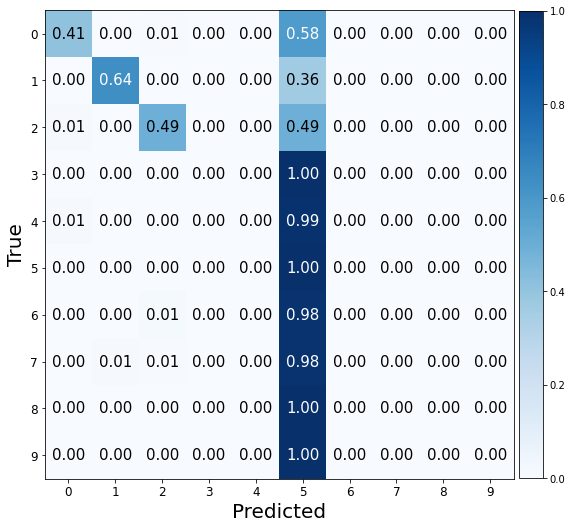

###################

ne: 125, hd:50, wd:0.005, lr: 0.05, bs:300 
Valid Evaluation loss: 2.3049328327178955. f1:0.1127217472290281 acc: 0.18799999356269836 


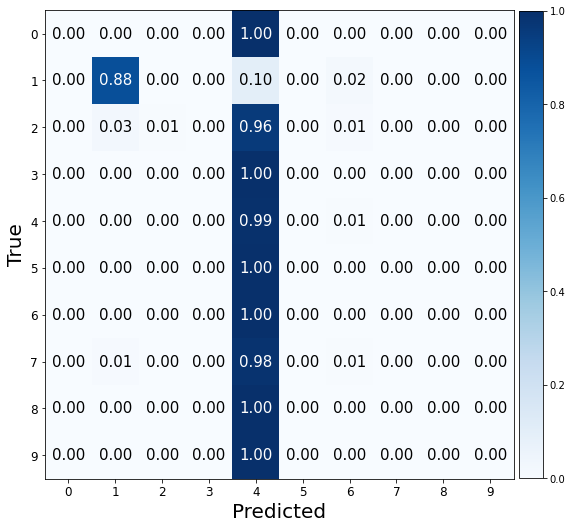

###################

ne: 125, hd:30, wd:0.05, lr: 0.05, bs:300 
Valid Evaluation loss: 2.0995724201202393. f1:0.10686743485565406 acc: 0.17749999463558197 


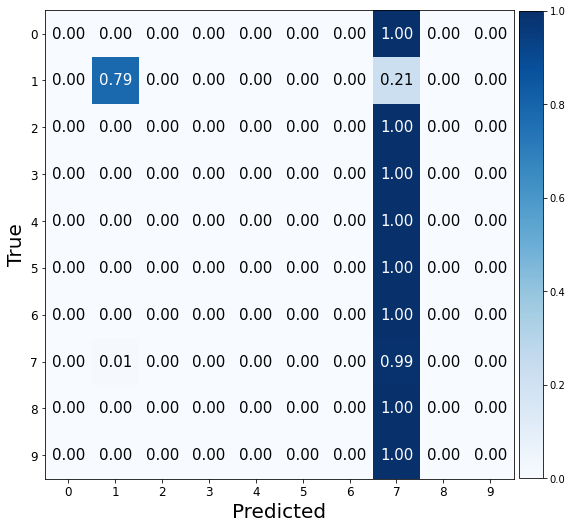

###################

ne: 125, hd:50, wd:0.05, lr: 0.05, bs:300 
Valid Evaluation loss: 2.174985647201538. f1:0.10873672163386365 acc: 0.18150000274181366 


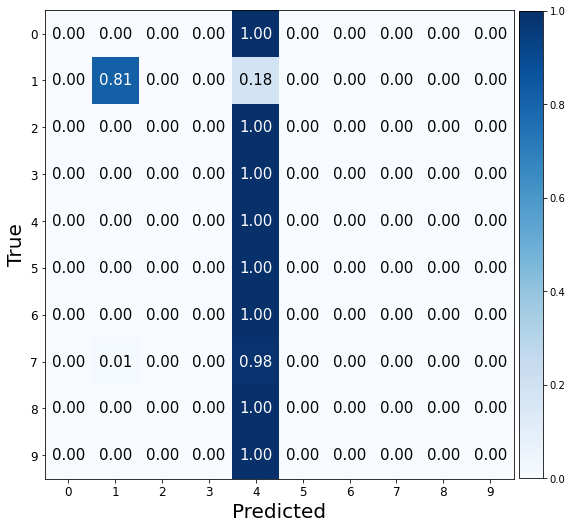

###################



In [15]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from tqdm.notebook import tqdm


bs_list = [128,300]
lr_list = [0.005,0.05]
wd_list = [0.005,0.05]
hd_list = [30,50]
ne_list = [75,125]

pbar = tqdm(total=len(bs_list)*len(lr_list)*len(wd_list)*len(hd_list)*len(ne_list))

for ne in ne_list:
  for bs in bs_list:
    train_ds = TensorDataset(X_train, Y_train)
    train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

    for lr in lr_list:
      for wd in wd_list:
        for hd in hd_list:
          input_dim = 28*28
          out_dim = 10
          hidden = hd

          model = torch.nn.Sequential(
            torch.nn.Linear(input_dim, hidden),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden, out_dim)
          )

          optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
          criterion = torch.nn.CrossEntropyLoss()

          print('ne: {}, hd:{}, wd:{}, lr: {}, bs:{} '.format(ne,hd,wd,lr,bs))
          train_valid(model,ne,optimizer,criterion)
          print('###################\n')

          pbar.update()
pbar.close()

  0%|          | 0/32 [00:00<?, ?it/s]

ne: 75, hd:30, wd:0.005, lr: 0.005, bs:128 
Valid Evaluation loss: 0.6741159558296204. f1:0.8027180295428588 acc: 0.8044999837875366 


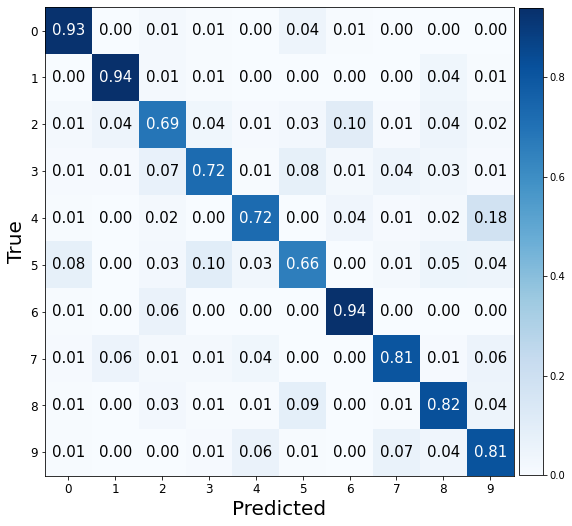

###################

ne: 75, hd:50, wd:0.005, lr: 0.005, bs:128 
Valid Evaluation loss: 0.5178911685943604. f1:0.8555525274706437 acc: 0.8560000061988831 


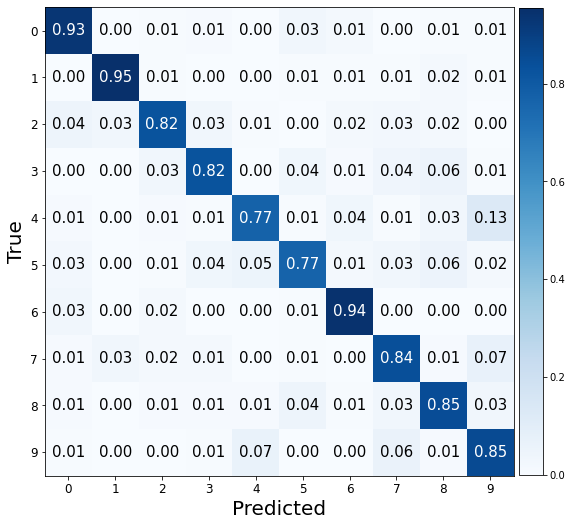

###################

ne: 75, hd:30, wd:0.05, lr: 0.005, bs:128 
Valid Evaluation loss: 1.8484352827072144. f1:0.19897137240934018 acc: 0.2874999940395355 


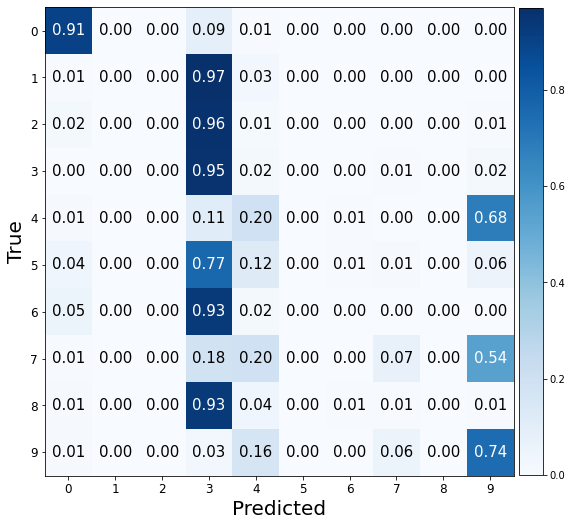

###################

ne: 75, hd:50, wd:0.05, lr: 0.005, bs:128 
Valid Evaluation loss: 0.49883899092674255. f1:0.8479744038729479 acc: 0.8475000262260437 


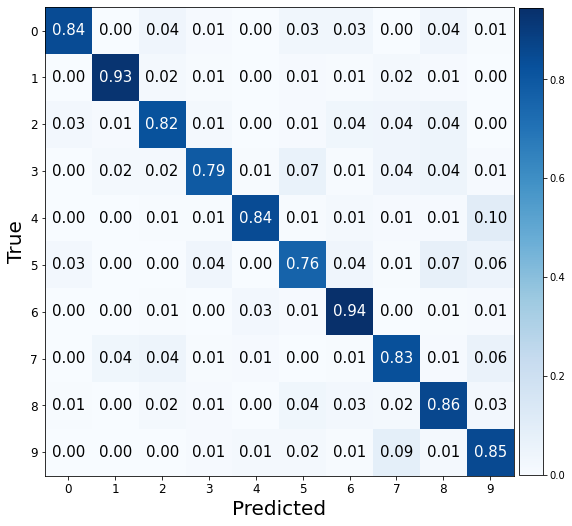

###################

ne: 75, hd:30, wd:0.005, lr: 0.05, bs:128 
Valid Evaluation loss: 2.182036876678467. f1:0.09840300038838104 acc: 0.16599999368190765 


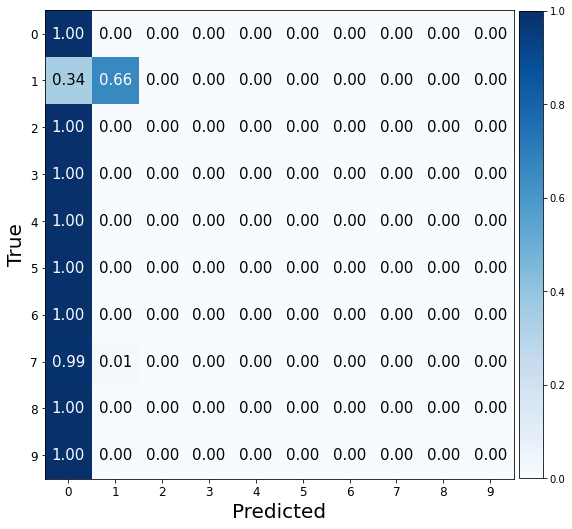

###################

ne: 75, hd:50, wd:0.005, lr: 0.05, bs:128 
Valid Evaluation loss: 2.2203078269958496. f1:0.07496524928972939 acc: 0.13899999856948853 


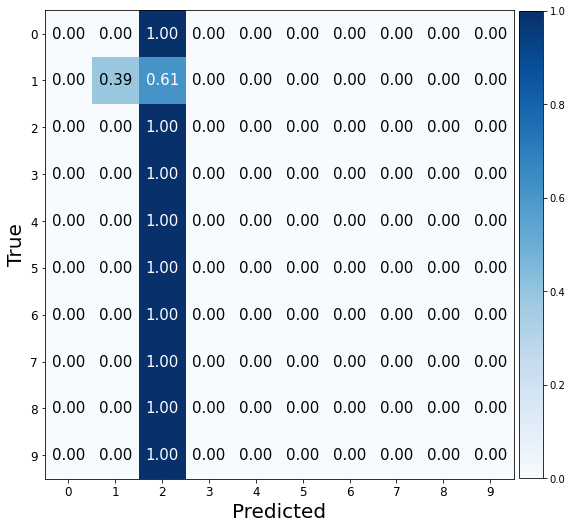

###################

ne: 75, hd:30, wd:0.05, lr: 0.05, bs:128 
Valid Evaluation loss: 2.297264337539673. f1:0.026803989789533623 acc: 0.10450000315904617 


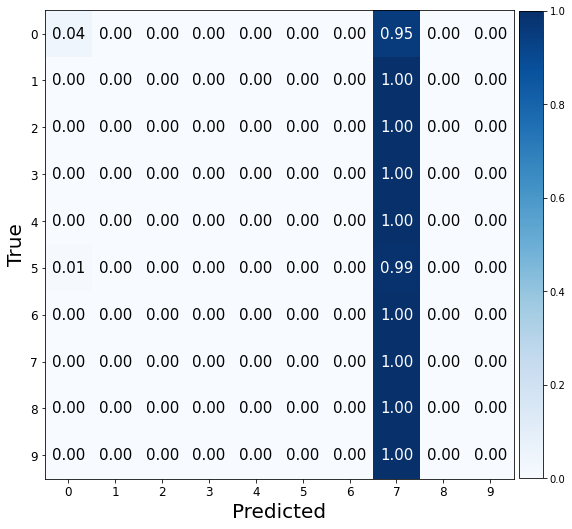

###################

ne: 75, hd:50, wd:0.05, lr: 0.05, bs:128 
Valid Evaluation loss: 2.0377392768859863. f1:0.23915028240555175 acc: 0.27300000190734863 


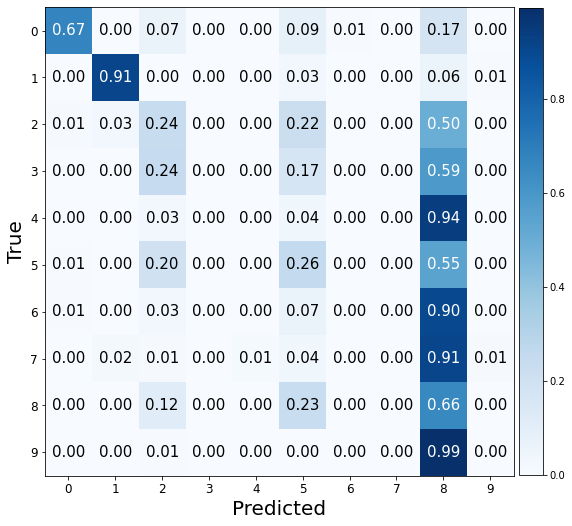

###################

ne: 75, hd:30, wd:0.005, lr: 0.005, bs:300 
Valid Evaluation loss: 0.7017109394073486. f1:0.81141800926993 acc: 0.8119999766349792 


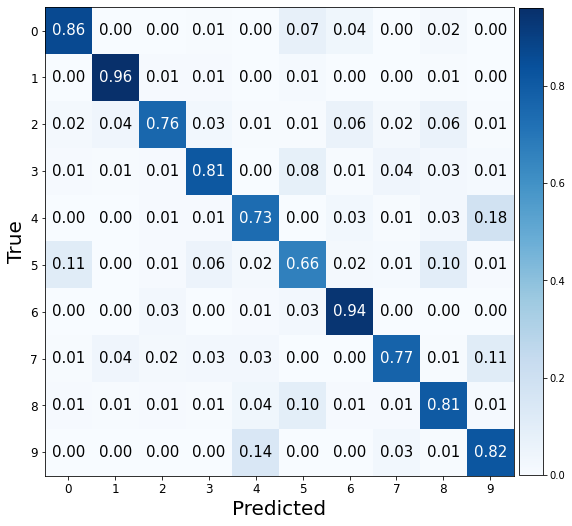

###################

ne: 75, hd:50, wd:0.005, lr: 0.005, bs:300 
Valid Evaluation loss: 0.5372609496116638. f1:0.8566519623659248 acc: 0.8569999933242798 


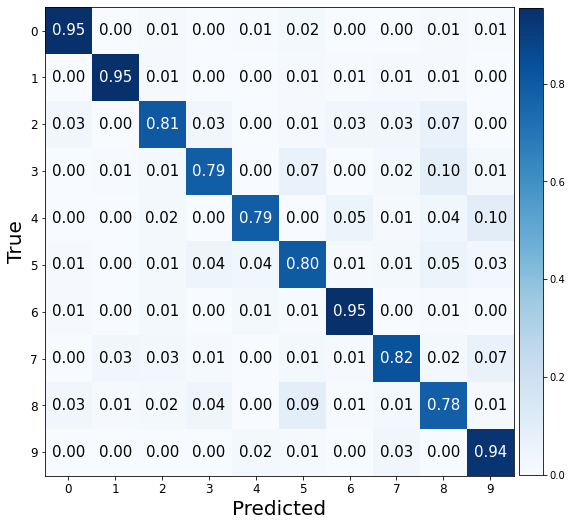

###################

ne: 75, hd:30, wd:0.05, lr: 0.005, bs:300 
Valid Evaluation loss: 0.4285767078399658. f1:0.8720488018972639 acc: 0.8725000023841858 


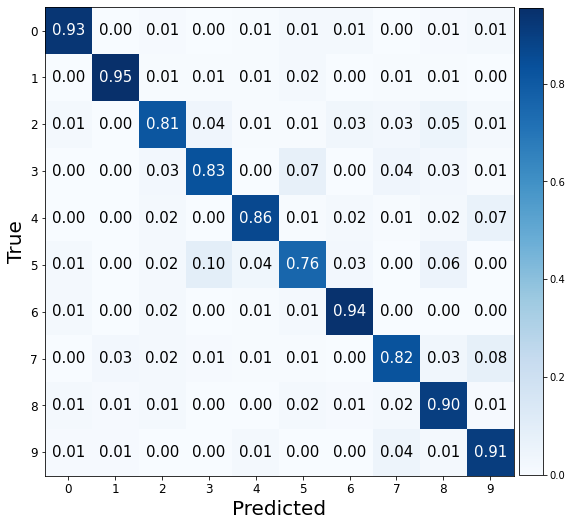

###################

ne: 75, hd:50, wd:0.05, lr: 0.005, bs:300 
Valid Evaluation loss: 0.4847181737422943. f1:0.8681096590066181 acc: 0.8679999709129333 


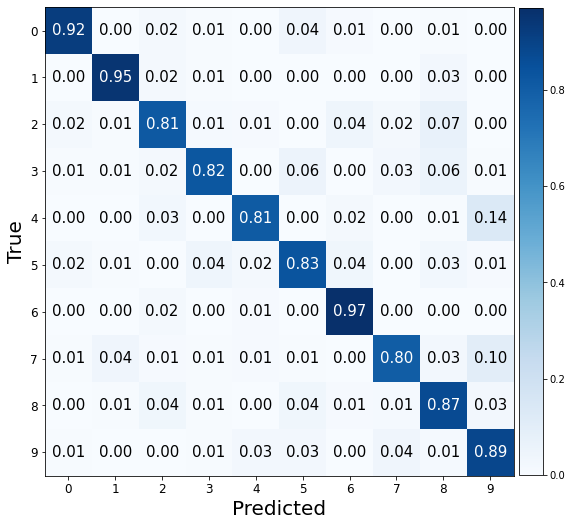

###################

ne: 75, hd:30, wd:0.005, lr: 0.05, bs:300 
Valid Evaluation loss: 2.8549892902374268. f1:0.10273637948772682 acc: 0.16750000417232513 


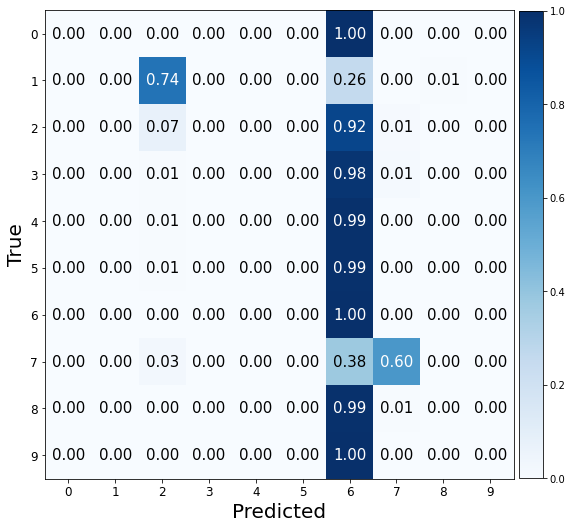

###################

ne: 75, hd:50, wd:0.005, lr: 0.05, bs:300 
Valid Evaluation loss: 2.413595676422119. f1:0.11391049603583056 acc: 0.16449999809265137 


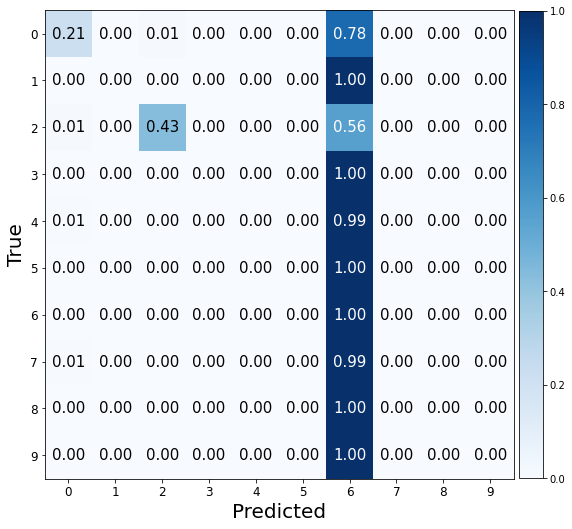

###################

ne: 75, hd:30, wd:0.05, lr: 0.05, bs:300 
Valid Evaluation loss: 2.0723252296447754. f1:0.11511629643238482 acc: 0.19449999928474426 


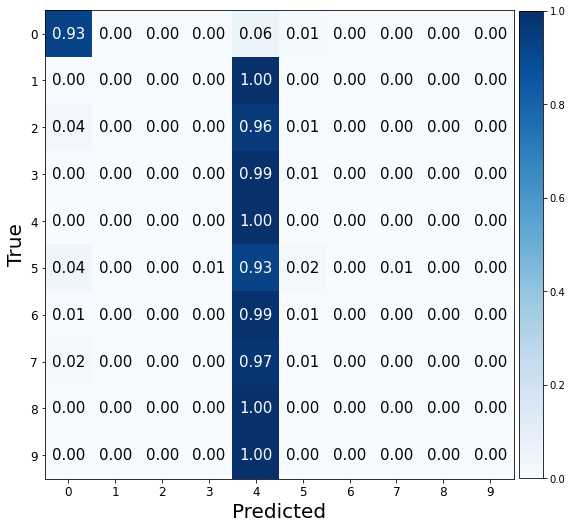

###################

ne: 75, hd:50, wd:0.05, lr: 0.05, bs:300 
Valid Evaluation loss: 2.02665638923645. f1:0.20817211105753777 acc: 0.25600001215934753 


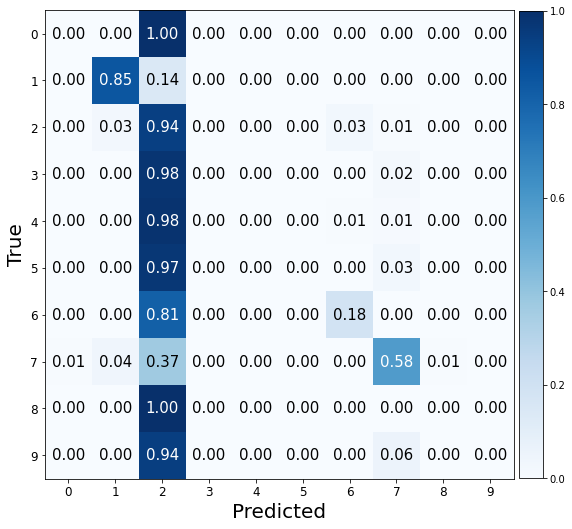

###################

ne: 125, hd:30, wd:0.005, lr: 0.005, bs:128 
Valid Evaluation loss: 0.563408613204956. f1:0.8462354616690735 acc: 0.8464999794960022 


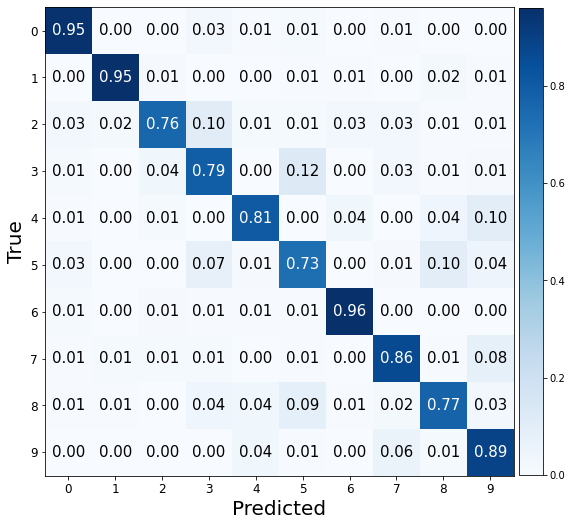

###################

ne: 125, hd:50, wd:0.005, lr: 0.005, bs:128 
Valid Evaluation loss: 0.42925068736076355. f1:0.8860925850539138 acc: 0.8865000009536743 


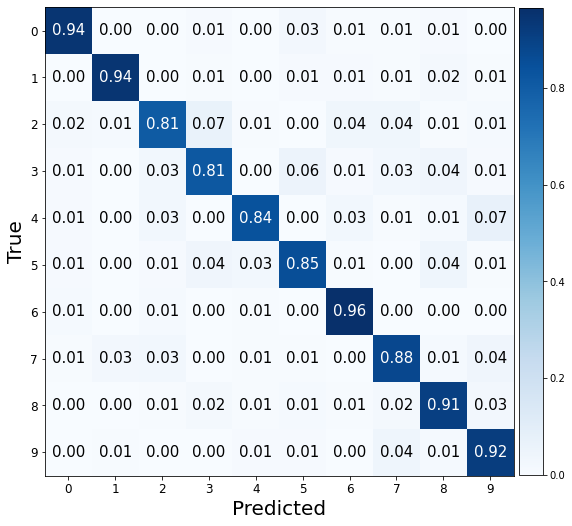

###################

ne: 125, hd:30, wd:0.05, lr: 0.005, bs:128 
Valid Evaluation loss: 0.41775405406951904. f1:0.8835259390939232 acc: 0.8845000267028809 


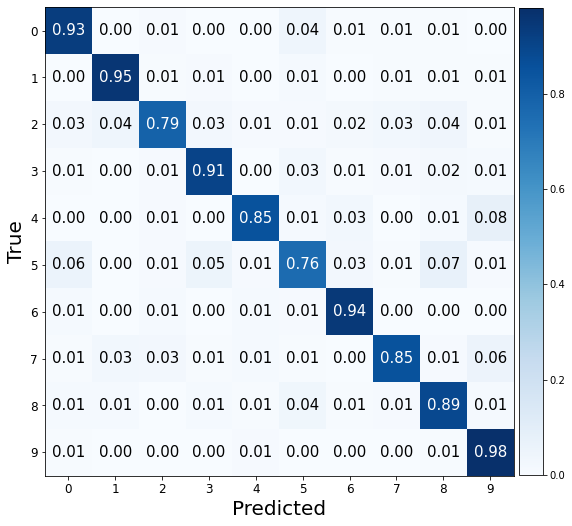

###################

ne: 125, hd:50, wd:0.05, lr: 0.005, bs:128 
Valid Evaluation loss: 0.445330411195755. f1:0.8742253311479999 acc: 0.8744999766349792 


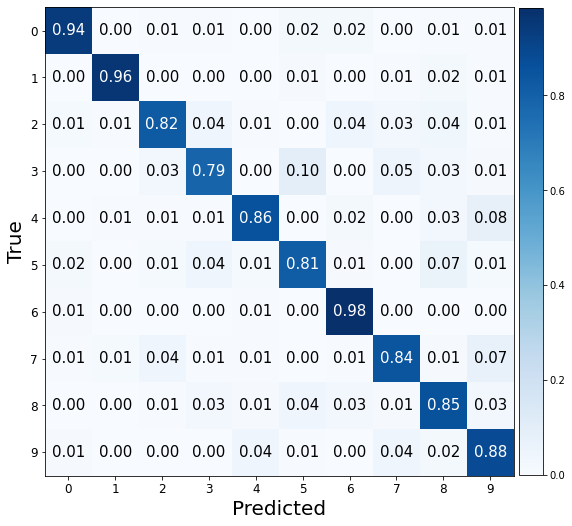

###################

ne: 125, hd:30, wd:0.005, lr: 0.05, bs:128 
Valid Evaluation loss: 2.3026018142700195. f1:0.01818181818181818 acc: 0.10000000149011612 


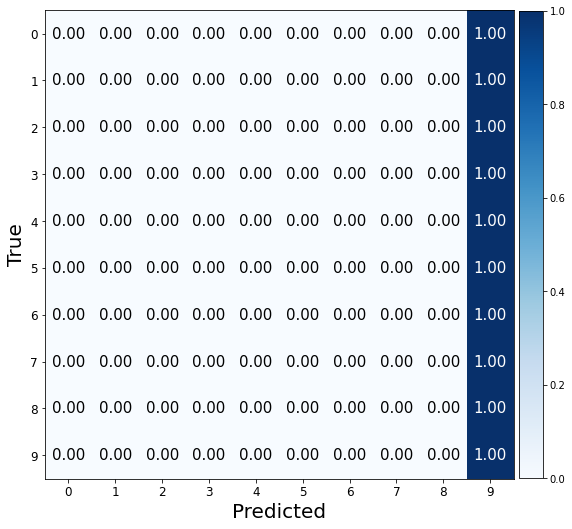

###################

ne: 125, hd:50, wd:0.005, lr: 0.05, bs:128 
Valid Evaluation loss: 2.7899718284606934. f1:0.09967481038658452 acc: 0.16500000655651093 


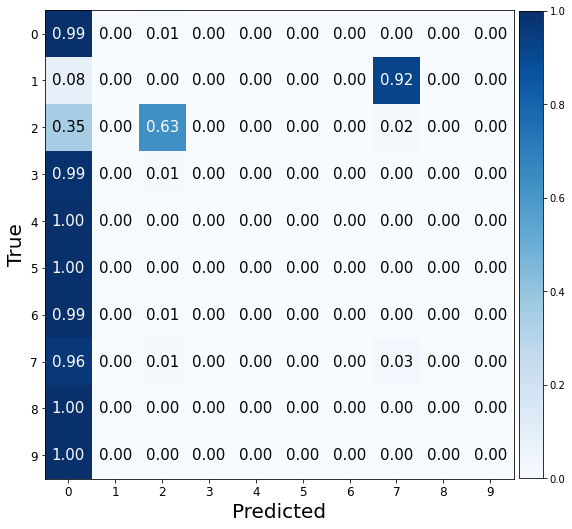

###################

ne: 125, hd:30, wd:0.05, lr: 0.05, bs:128 
Valid Evaluation loss: 2.3596880435943604. f1:0.01818181818181818 acc: 0.10000000149011612 


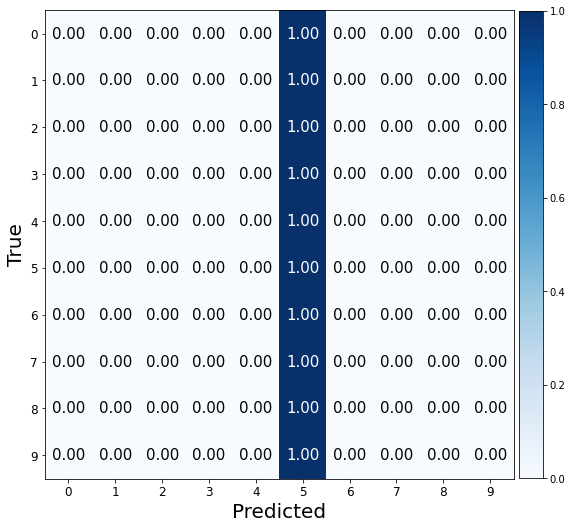

###################

ne: 125, hd:50, wd:0.05, lr: 0.05, bs:128 
Valid Evaluation loss: 2.1801536083221436. f1:0.08766140602582498 acc: 0.15199999511241913 


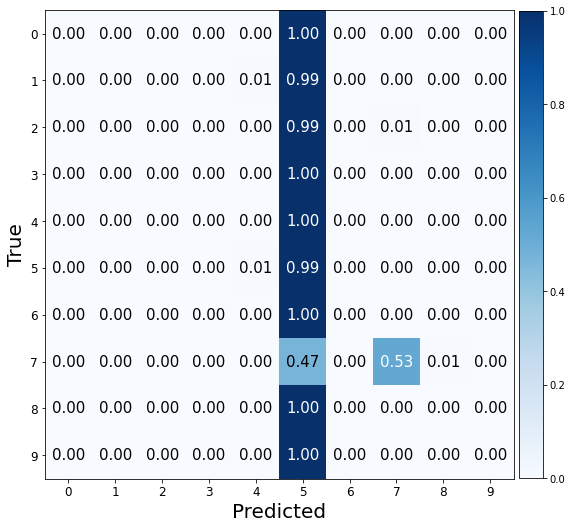

###################

ne: 125, hd:30, wd:0.005, lr: 0.005, bs:300 
Valid Evaluation loss: 0.6564027070999146. f1:0.8203419718581662 acc: 0.8205000162124634 


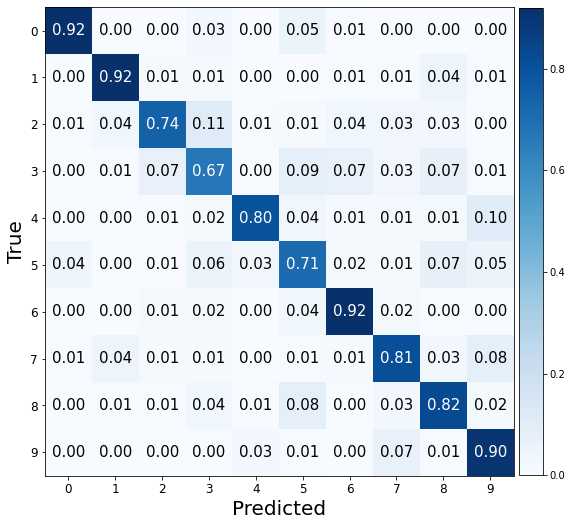

###################

ne: 125, hd:50, wd:0.005, lr: 0.005, bs:300 
Valid Evaluation loss: 0.42103326320648193. f1:0.8953152194156878 acc: 0.8955000042915344 


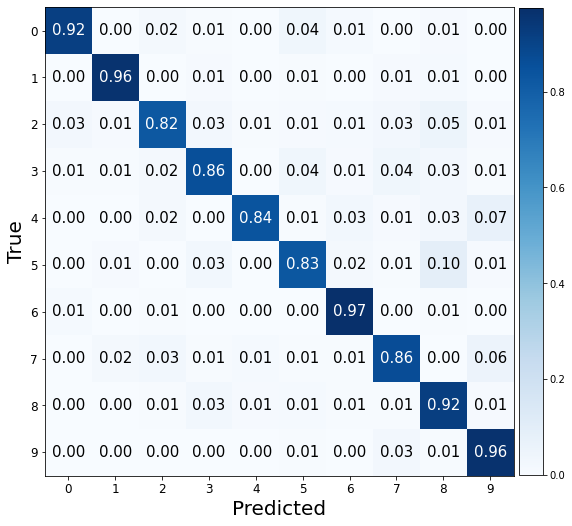

###################

ne: 125, hd:30, wd:0.05, lr: 0.005, bs:300 
Valid Evaluation loss: 0.5208719968795776. f1:0.8402791239583491 acc: 0.840499997138977 


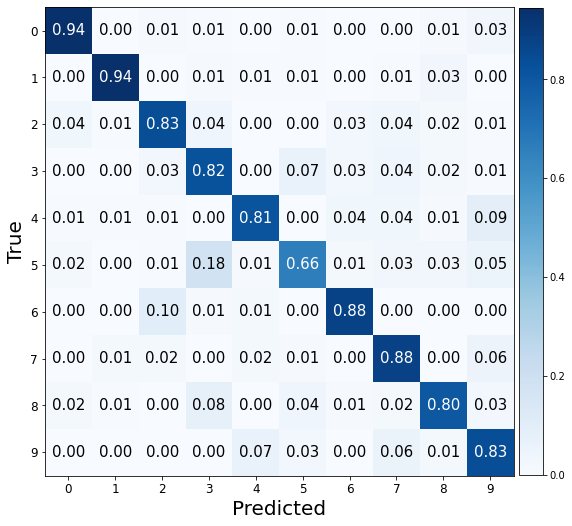

###################

ne: 125, hd:50, wd:0.05, lr: 0.005, bs:300 
Valid Evaluation loss: 0.33244994282722473. f1:0.9008580348494692 acc: 0.9014999866485596 


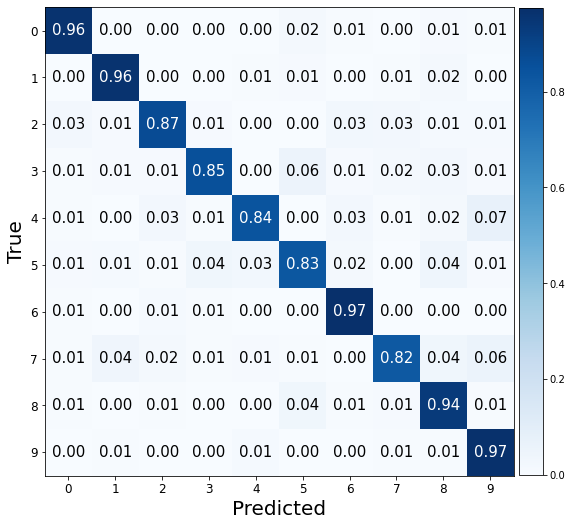

###################

ne: 125, hd:30, wd:0.005, lr: 0.05, bs:300 
Valid Evaluation loss: 2.3039371967315674. f1:0.01818181818181818 acc: 0.10000000149011612 


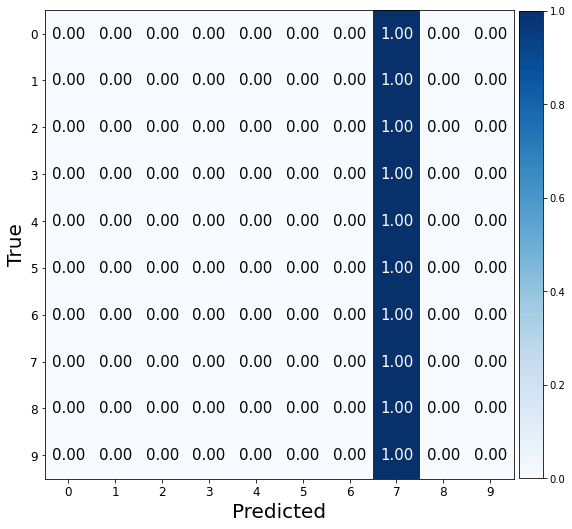

###################

ne: 125, hd:50, wd:0.005, lr: 0.05, bs:300 
Valid Evaluation loss: 2.0270466804504395. f1:0.1129348207517599 acc: 0.19349999725818634 


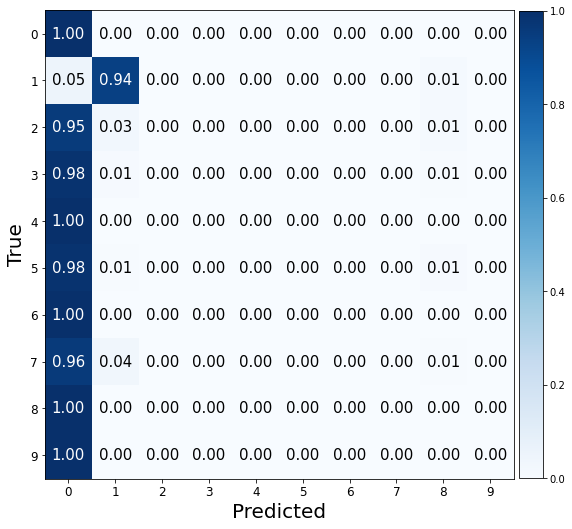

###################

ne: 125, hd:30, wd:0.05, lr: 0.05, bs:300 
Valid Evaluation loss: 2.3026397228240967. f1:0.01818181818181818 acc: 0.10000000149011612 


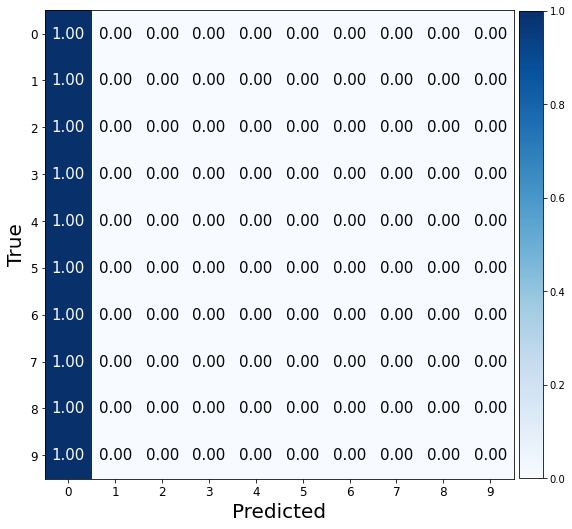

###################

ne: 125, hd:50, wd:0.05, lr: 0.05, bs:300 
Valid Evaluation loss: 2.1316936016082764. f1:0.11397822794762158 acc: 0.17749999463558197 


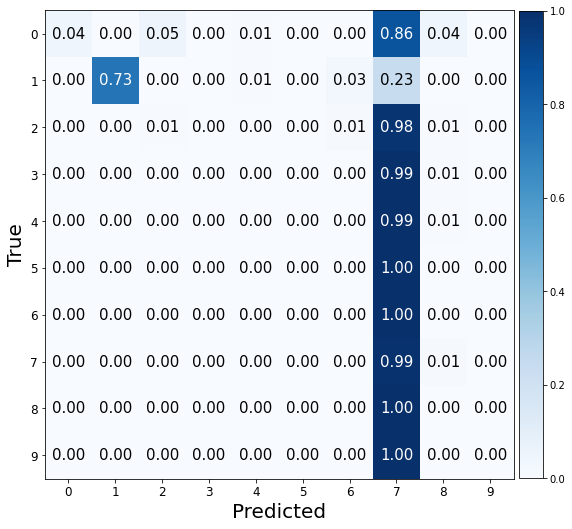

###################



In [16]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from tqdm.notebook import tqdm


bs_list = [128,300]
lr_list = [0.005,0.05]
wd_list = [0.005,0.05]
hd_list = [30,50]
ne_list = [75,125]

pbar = tqdm(total=len(bs_list)*len(lr_list)*len(wd_list)*len(hd_list)*len(ne_list))

for ne in ne_list:
  for bs in bs_list:
    train_ds = TensorDataset(X_train, Y_train)
    train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)

    for lr in lr_list:
      for wd in wd_list:
        for hd in hd_list:
          input_dim = 28*28
          out_dim = 10
          hidden = hd

          model = torch.nn.Sequential(
            torch.nn.Linear(input_dim, hidden),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden, hidden),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden, out_dim)
          )

          optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
          criterion = torch.nn.CrossEntropyLoss()

          print('ne: {}, hd:{}, wd:{}, lr: {}, bs:{} '.format(ne,hd,wd,lr,bs))
          train_valid(model,ne,optimizer,criterion)
          print('###################\n')

          pbar.update()
pbar.close()

Analizando ambos modelos cuya única diferencia es que el segundo tiene una neurona más y una capa de activación más podemos concluir que el segundo modelo fue más eficiente ya que temporalmente hablando lo hizo en menos tiempo y si analizamos las posibles combinaciones que hay entre los parametros variados podemos evidenciar que el segundo tiene muchas menos confusiones en los valores que no están en la diagonal lo cual nos dice que trabajando con más neuronas, puede procesar mucho mejor la información el modelo diseñado. Para no gastar tanto tiempo solo se tomaron 2 metaparametros de cada 1 y con estos valores se obtuvo la mayor cantidad de valores en la diagonal. Por otra parte en el primer modelo la mejor combinación tuvo en la diagonal como "peor" valor un 72% de coincidencias y con valores de loss: 0.8718951940536499. f1:0.8313321122210915 acc: 0.8230000138282776 , mientras que en el segundo tuvo como menor valor un 82% y unos valores de loss=0.33244994282722473. f1:0.9008580348494692 acc: 0.9014999866485596 , lo cual nos dice que no solo fue más eficiente sino que tambíen en los "micromodelos" tuvo una mejor efectividad con mejores valores de perdidas, de f1 y de accuracy.